In [73]:
import os
import sys
import time
from naoqi import ALProxy
import numpy as np
import cv2
import time
from datetime import datetime
import os
# import pika #1.1.0
import base64
import time 
import yaml
import cv2
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [74]:
NAO_IP = "10.0.255.8"
NAO_PORT = 9559
PEPPER_IP = "10.0.52.247"
PEPPER_PORT = 9503

width = 1280
height = 960
channel = 3
 
fps = 30
sec = 5

In [83]:
def detect(frame):
  
  img = frame.copy()
  lower_red = np.array([0, 0, 90])
  upper_red = np.array([120, 60, 255])

  # Create a mask to isolate the red color region in the RGB image
  frame = cv2.inRange(frame, lower_red, upper_red)
  kernel = np.ones((3, 3), np.float32) / 9

  frame = cv2.erode(frame, kernel, iterations=3)

  contours, _ = cv2.findContours(frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # If contours are found
  if contours:
    # Get the largest contour (assuming it's the blob)
      largest_contour = max(contours, key=cv2.contourArea)
      
      # Find the minimum enclosing circle for the contour
      (x, y), radius = cv2.minEnclosingCircle(largest_contour)
      
      # Convert the coordinates to integers
      center = (int(x), int(y))
      radius = int(radius)
      
      # Draw the minimum enclosing circle on a color image
      frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)  # Convert to color image
      cv2.circle(img, center, radius, (0, 0, 255), 2)  # Draw red circle
      
      print("Radius of the blob:", radius)
  else:
      print("No blob found.")

      
  return img

In [84]:
tts = ALProxy("ALVideoDevice", NAO_IP, NAO_PORT)
camera_index = 0
resolution = 3
colourspace = 11
FPS = 5

subscriberID = tts.subscribeCamera("subscriberID", camera_index, resolution,colourspace, FPS)
print("id : " , subscriberID)
tts.openCamera(camera_index)
tts.startCamera(camera_index)


while True:

  nao_image = tts.getImageRemote(str(subscriberID))

  img = (np.reshape(np.frombuffer(nao_image[6], dtype = '%iuint8' % nao_image[2]), (nao_image[1], nao_image[0], nao_image[2])))
  img = np.array(img)
  #img = np.flipud(img)
  cv2.imwrite("img.jpg" , img)

  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) 

  # print( (nao_image[1], nao_image[0], nao_image[2]) , time.time())

  img = detect(img)

  cv2.imshow("Output", img)

  k = cv2.waitKey(33)
  if k==27:    # Esc key to stop
    break
  
tts.releaseImage(subscriberID)
tts.unsubscribe(subscriberID)

cv2.destroyAllWindows()

('id : ', 'subscriberID_2')
('Radius of the blob:', 68)
('Radius of the blob:', 69)
('Radius of the blob:', 71)
('Radius of the blob:', 70)
('Radius of the blob:', 67)
('Radius of the blob:', 68)
('Radius of the blob:', 67)
('Radius of the blob:', 69)
('Radius of the blob:', 69)
('Radius of the blob:', 15)
('Radius of the blob:', 67)
('Radius of the blob:', 72)
('Radius of the blob:', 79)
('Radius of the blob:', 94)
('Radius of the blob:', 106)
('Radius of the blob:', 111)
('Radius of the blob:', 115)
('Radius of the blob:', 141)
('Radius of the blob:', 176)
('Radius of the blob:', 177)
('Radius of the blob:', 164)
('Radius of the blob:', 165)
('Radius of the blob:', 175)
('Radius of the blob:', 177)
('Radius of the blob:', 165)
('Radius of the blob:', 170)
('Radius of the blob:', 157)
('Radius of the blob:', 147)
('Radius of the blob:', 142)
('Radius of the blob:', 145)
('Radius of the blob:', 147)
('Radius of the blob:', 150)
('Radius of the blob:', 149)
('Radius of the blob:', 155)


In [97]:
['LShoulderPitch' , 'LShoulderRoll', 'LElbowYaw', 'LElbowRoll', 'LWristYaw2']

In [123]:
motion_service = ALProxy("ALMotion" , NAO_IP, NAO_PORT)

motion_service.setStiffnesses("RArm", 1.0)

names = "RElbowRoll"
angles = -1.5
fractionMaxSpeed = 0.5 

# motion_service.setAngles(names, angles, fractionMaxSpeed)

# time.sleep(5)

# motion_service.setStiffnesses("RElbowRoll", 0.0)

In [117]:
motion_service = ALProxy("ALMotion" , NAO_IP, NAO_PORT)
target_angles = [0.0, 0.0, 0.0, -1.2] 
max_speed_fraction = 0.2 

motion_service.setStiffnesses("RArm", 1.0)

motion_service.setAngles( ["RShoulderPitch", "RShoulderRoll", "RElbowYaw", "RElbowRoll"], target_angles, max_speed_fraction)

In [112]:
motion_service.closeHand('RHand')

In [128]:
motion_service = ALProxy("ALMotion" , NAO_IP, NAO_PORT)

motion_service.setStiffnesses("Head", 1.0)

# Simple command for the HeadYaw joint at 10% max speed
names            = "HeadYaw"
angles           = -0.5
fractionMaxSpeed = 0.1
motion_service.setAngles(names,angles,fractionMaxSpeed)


In [51]:
cv2.destroyAllWindows()

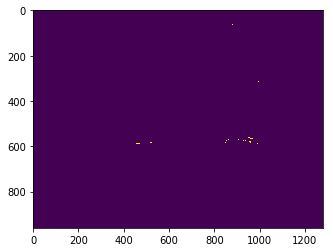

In [82]:
frame = cv2.imread("img.jpg")

lower_red = np.array([0, 0, 90])
upper_red = np.array([120, 60, 255])

# Create a mask to isolate the red color region in the RGB image
mask = cv2.inRange(frame, lower_red, upper_red)
kernel = np.ones((3, 3), np.float32) / 9

mask = cv2.erode(mask, kernel, iterations=3)
# plt.imshow(mask)

In [53]:
# Find contours in the image
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# If contours are found
if contours:
   # Get the largest contour (assuming it's the blob)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Find the minimum enclosing circle for the contour
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    
    # Convert the coordinates to integers
    center = (int(x), int(y))
    radius = int(radius)
    
    # Draw the minimum enclosing circle on a color image
    image_with_circle = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)  # Convert to color image
    cv2.circle(image_with_circle, center, radius, (0, 0, 255), 2)  # Draw red circle
    
    print("Radius of the blob:", radius)
else:
    print("No blob found.")

No blob found.


In [54]:
plt.imshow(image_with_circle)

NameError: name 'image_with_circle' is not defined

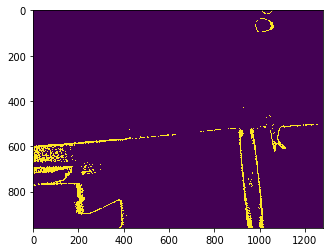

In [ ]:
lower_red = np.array([0, 0, 100])
upper_red = np.array([120, 200, 255])

# Create a mask to isolate the red color region in the RGB image
mask = cv2.inRange(frame, lower_red, upper_red)
plt.imshow(mask)

In [ ]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, red_Low, red_Up)
plt.imshow(mask)

NameError: name 'red_Low' is not defined

In [ ]:


mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
centre = None
if len(cnts) > 0:
    c = max(cnts, key = cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    M = cv2.moments(c)
    centre = (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"]))
    if radius > 10:
        flag_red_ball = 1
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
        cv2.circle(frame, centre, 3, (0, 0, 255), -1)
cv2.imwrite('Frame.jpg', frame)

True